## Classification


### 3.1 Data 1: separate 2 Gaussians

Generating data

mu1 = (0, 0)
mu2 = (1, 1)

cov1 = cov2 = \begin{bmatrix}1\quad 0\\0\quad 1\end{bmatrix}

In [68]:
import numpy as np
from matplotlib import pyplot
from plotnine import *
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(42)

mu_vec1 = np.array([0, 0])

mu_vec2 = np.array([1, 1])

cov_mat1 = np.array([[1,0],[0,1]])

cov_mat2 = np.array([[1,0],[0,1]])

# Draw random samples from a multivariate normal distribution 


class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T


print (class1_sample.shape)


(2, 20)


### Just to get a rough idea how the samples of our two classes a and b are distributed, let us plot them in a 3D scatter plot.

In [69]:
from plotnine import *
%matplotlib inline
import matplotlib.pyplot as plt

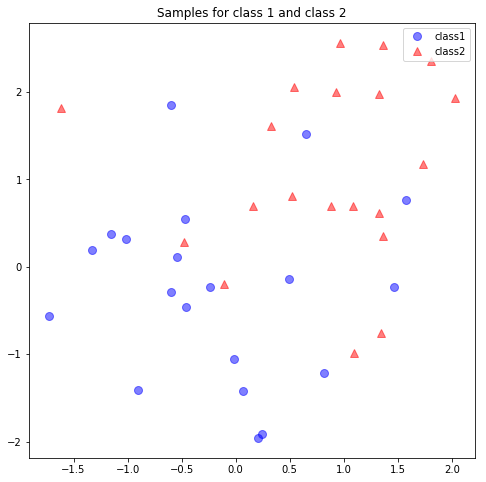

In [70]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.rcParams['legend.fontsize'] = 10   

ax.plot(class1_sample[0,:], class1_sample[1,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:],
        '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

### Computing the mean of each class

mean vector for each class will be a 2x1 vector

In [71]:
mean_class1_x = np.mean(class1_sample[0])
mean_class1_y = np.mean(class1_sample[1])

mean_class1 = np.array([mean_class1_x, mean_class1_y])

mean_class2_x = np.mean(class2_sample[0])
mean_class2_y = np.mean(class2_sample[1])

mean_class2 = np.array([mean_class2_x, mean_class2_y])

print (mean_class1, mean_class2)

[-0.17610301 -0.26117067] [ 0.8299379   1.11197517]


Random vector w = [-0.5, 1.5]

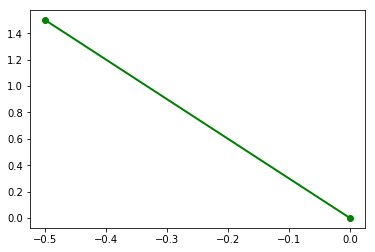

In [72]:
fig = plt.figure()
ax = plt.axes()

plt.plot([0, -0.5], [0, 1.5], 'go-', label='line 1', linewidth=2)


### Choices of w

In [73]:
def compute_projections_and_plot(w):
    Y_first_class = w.reshape(1, 2).dot(class1_sample)
    Y_second_class = w.reshape(1, 2).dot(class2_sample)
    pyplot.hist(Y_first_class[0],  alpha=0.5, label='class 1')
    pyplot.hist(Y_second_class[0],  alpha=0.5, label='class 2')
    pyplot.legend(loc='upper right')
    pyplot.title("Plot for choice of w as: "+str(w))
    pyplot.show()

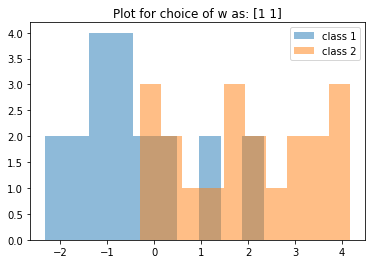

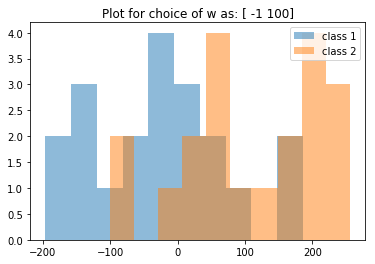

In [74]:
# [1, 1] [-1, 1] [-1, -1], [1, -1]

choices_of_w = [[1, 1], [-1, 100]]

for choice in choices_of_w:
    w = np.array(choice)
    compute_projections_and_plot(w)
    



It is clear that when the wt vector lies in 2nd or 3rd quad, there is a lot of overlap

Now we try various combinations in 1st or 4th quad

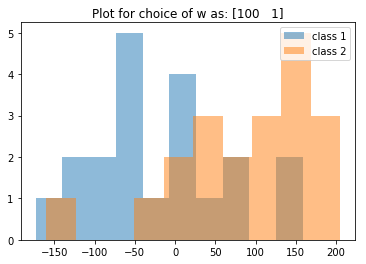

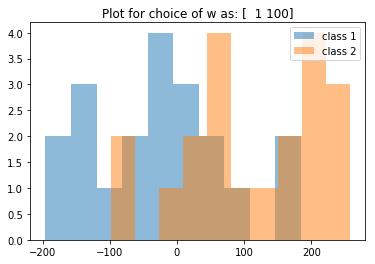

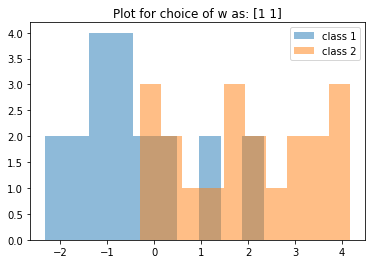

In [75]:
choices_of_w = [[100, 1], [1, 100], [1,1]]

for choice in choices_of_w:
    w = np.array(choice)
    compute_projections_and_plot(w)
    

It seems as if when x and y are similar there is best separation

### Y = W.x: computing the projections

In [76]:
w = np.array([[1, 1]])
print(w.shape)
Y_first_class = w.reshape(1, 2).dot(class1_sample)

Y_first_class

Y_second_class = w.reshape(1, 2).dot(class2_sample)

Y_second_class[0]

(1, 2)


array([ 2.90983486,  1.58324802, -0.1983662 ,  2.59648346,  0.58057813,
        1.93900169,  1.93475429,  3.96227964,  0.8515701 ,  3.30680856,
        1.33516679, -0.3025416 ,  4.16876585,  2.93152278,  1.71651627,
        3.89943217,  3.52881762,  0.2021574 ,  1.78803972,  0.10419186])

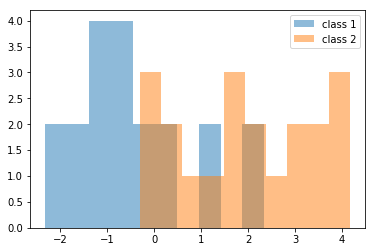

In [77]:


pyplot.hist(Y_first_class[0],  alpha=0.5, label='class 1')
pyplot.hist(Y_second_class[0],  alpha=0.5, label='class 2')
pyplot.legend(loc='upper right')
pyplot.show()

We know:

$$\frac{1}{n_{c}}\sum_{n} w^{T}x^{n} = w^{T}\frac{1}{n_{c}}\sum_{n} x^{n} = w^{T}\mu_{c} = m_{c}$$

Also

$$\frac{1}{n_{c}}\sum_{n} w^{T}x^{n} = \frac{1}{n_{c}}\sum_{n} y^{n} = m_{c}$$


In [78]:
mean_class1_red = np.mean(Y_first_class)

mean_class2_red = np.mean(Y_second_class)

print (mean_class1_red)

-0.437273676836


In [79]:
w.reshape(1,2).dot(mean_class1.reshape(2,1))

array([[-0.43727368]])

### Computing std devs for projected data for each class

- Insert eqn

In [80]:
s_class1_sq = ((Y_first_class - mean_class1_red).dot((Y_first_class - mean_class1_red).T)/20)[0][0]

s_class1_sq

s_class2_sq = ((Y_second_class - mean_class2_red).dot((Y_second_class - mean_class2_red).T)/20)[0][0]

s_class2_sq

1.9617123683811037

In [81]:
w.reshape(2,1).T.dot((class1_sample - mean_class1.reshape(2, 1)).dot((class1_sample - mean_class1.reshape(2, 1)).T.dot(w.reshape(2, 1))))

array([[ 33.68743401]])

### Computing Fisher Ratio F(w)

$$F(w) = \frac{(m_{a} + m_{b})^{2}}{\frac{n_{a}}{n_{a} + n_{b}}s_{a}^{2} + \frac{n_{b}}{n_{a} + n_{b}}s_{b}^{2}}$$

In [117]:
w = np.array([[3,1]]) # 1.2418472320582281 for [1,1]

def FisherScore(w):
    
    print ("w:")
    
    Y_first_class = w.reshape(1, 2).dot(class1_sample)
    Y_second_class = w.reshape(1, 2).dot(class2_sample)
    
    mean_class1_red = np.mean(Y_first_class)
    mean_class2_red = np.mean(Y_second_class)

    s_class1_sq = ((Y_first_class - mean_class1_red).dot((Y_first_class - mean_class1_red).T)/20)[0][0]
    s_class2_sq = ((Y_second_class - mean_class2_red).dot((Y_second_class - mean_class2_red).T)/20)[0][0]

    n_a = len(class1_sample[0])
    n_b = len(class2_sample[0])

    F_numerator = (mean_class1_red + mean_class2_red)**2

    F_denominator = (n_a/(n_a + n_b))*s_class1_sq + (n_a/(n_a + n_b))*s_class2_sq

    F = F_numerator/F_denominator

    return F

FisherScore(w)

1.0210868526232622

### w(θ) = R(θ)w(0) 

In [115]:
theta = np.pi/4

R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

R

w = R.dot(w.reshape(2,1))
print (w)
w.reshape(1,2)

FisherScore(w)

[[ -1.41421356e+00]
 [  2.99760217e-15]]


array([[ -1.41421356e+00,   2.99760217e-15]])